# Model Training 

En este jupyter notebook se realiza el modelo de aprendizaje automático de regresión que tiene como objetivo predecir el índice de felicidad

#### Importamos las librerias necesarias 

In [22]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns

Puede instalar las librerias ejecutando el siguiente comando en la terminal: pip install -r requirements.txt

#### Añadimos el directorio raiz al sys.path para facilitar importaciones 

In [3]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: c:\Users\mirlo\workshop3


Si a este codigo lo ejecutas mas de una vez puede que empiese a pasear por tu directorio lo que puede generar errores en las importaiones, si te ocurre reinicia el Kernel y vuelvelo a ejecutar.

#### Cargamos el dataset en un Dataframe 

In [4]:
data_felicidad = pd.read_csv(r'Data\datos_felicidad_total.csv', delimiter=',')

#### Seleccionamos las columnas necesarias 

In [5]:
data_felicidad = data_felicidad[['Country or region', 'Region', 'GDP per capita', 'Social support', 'Healthy life expectancy',
             'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Dystopia_Residual', 'Score']]

#### Codificamos las columnas categoricas 

Convertimos las columnas categóricas 'Country or region' y 'Region' en valores numéricos utilizando `LabelEncoder`

In [6]:
label_encoder = LabelEncoder()
data_felicidad['Country or region'] = label_encoder.fit_transform(data_felicidad['Country or region'])
data_felicidad['Region'] = label_encoder.fit_transform(data_felicidad['Region'])
data_felicidad.head()

,Country or region,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia_Residual,Score
0,145,10,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,61,10,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,38,10,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,111,10,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,25,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


#### Dividimos los datos en características (X) y variable objetivo (y)

In [7]:
X = data_felicidad.drop(columns=['Score'])
y = data_felicidad['Score']

#### Dividimos los datos en conjunto de entrenamiento y prueba (70-30)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Entrenamos el modelo de regresión RandomForesRegressor

Se eligio este modelo debido a sus características y a su capacidad para manejar problemas de regresión con alta precisión

In [29]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Hacemos predicciones del conjunto de prueba 

In [30]:
y_pred = model.predict(X_test)

#### Evaluamos el rendimiento del modelo

Para evaluar el desempeño del modelo, se usaron una combinación de métricas que capturan diferentes aspectos del error y la precisión de la predicción:

- **Mean Squared Error (MSE) y Root Mean Squared Error (RMSE):** que miden la magnitud del error, penalizando los errores grandes en mayor medida, para asegurar precisión en las predicciones y detectar valores atípicos.
- **Mean Absolute Error (MAE):** Proporciona el error promedio sin exagerar la influencia de - valores atípicos, siendo una medida más intuitiva del error promedio en las predicciones.
- **R² Score y Explained Variance Score:** que permite evaluar la bondad de ajuste general, mostrando qué tan bien las variables predictoras explican la variable objetivo.

In [ ]:
mse = mean_squared_error(y_test, y_pred)                   
rmse = np.sqrt(mse)                                         
mae = mean_absolute_error(y_test, y_pred)                  
r2 = r2_score(y_test, y_pred)                              
explained_var = explained_variance_score(y_test, y_pred)    

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance Score: {explained_var:.4f}")

Mean Squared Error (MSE): 0.1715
Root Mean Squared Error (RMSE): 0.4141
Mean Absolute Error (MAE): 0.3063
R² Score: 0.8626
Explained Variance Score: 0.8627


Tenemos que el modelo logro una presision de hasta el 86.26% lo que refleja que el modelo tiene un ajuste fuerte y que las variables predictoras seleccionadas explican bien la variabilidad de la variable objetivo.

Los valores obtenidos en estas métricas reflejan que el modelo RandomForestRegressor es adecuado para este problema de predicción, logrando un equilibrio entre precisión y capacidad explicativa. En conjunto, estos resultados muestran que el modelo predice la variable objetivo con un buen nivel de exactitud y que captura la mayor parte de la variabilidad en los datos.

#### Exportamos el modelo 

In [19]:
dump(best_clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

#### Creamos graficas para tener una mejor idea del comportamiento del modelo

Creamos un gráfico de Dispersión entre Valores Reales y Predicciones

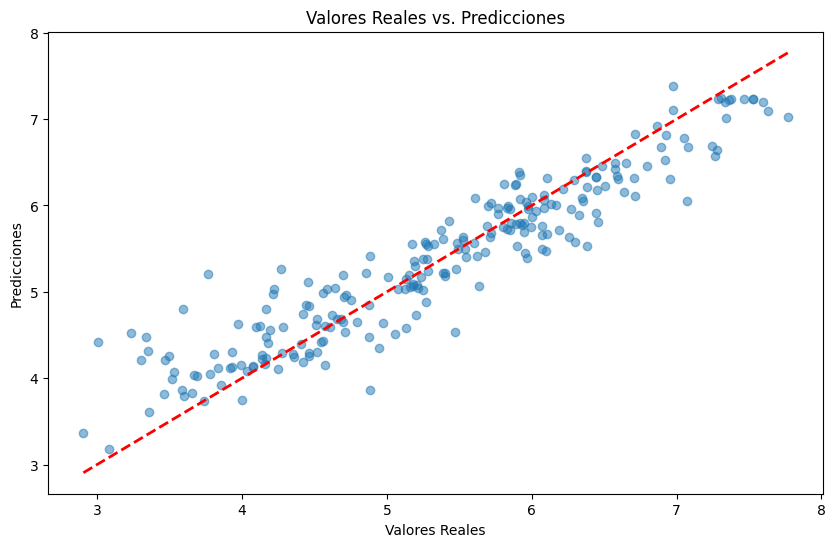

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()


Se puede observar que el modelo tiene un buen ajuste general, ya que muchas de las predicciones están cerca de los valores reales. Sin embargo, aún existen errores de predicción en algunos puntos.

Creamos un grafico de dispercion para ver la Distribución de los Errores

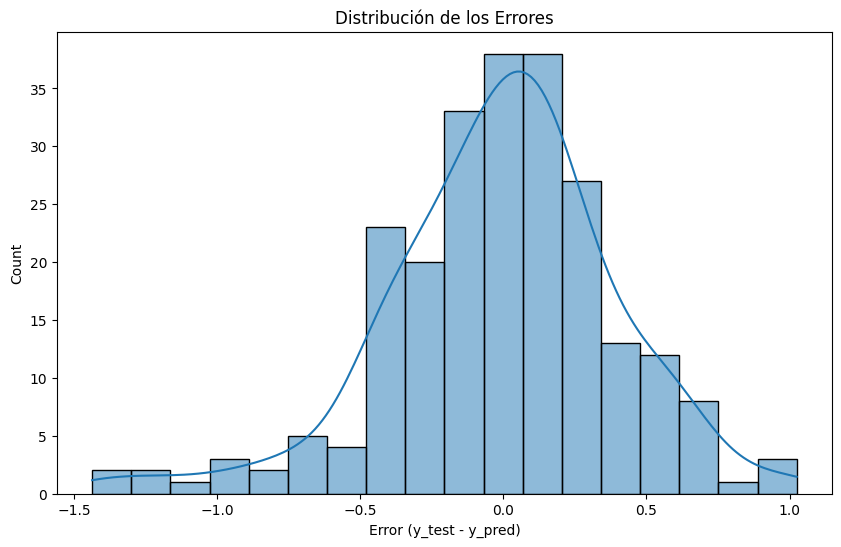

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel("Error (y_test - y_pred)")
plt.title("Distribución de los Errores")
plt.show()

Esta distribución de errores indica que el modelo tiene un buen rendimiento general, sin sesgo evidente en las predicciones y con errores relativamente bajos en su mayoría.

Creamos un grafico de distribucion para ver los Errores Absolutos

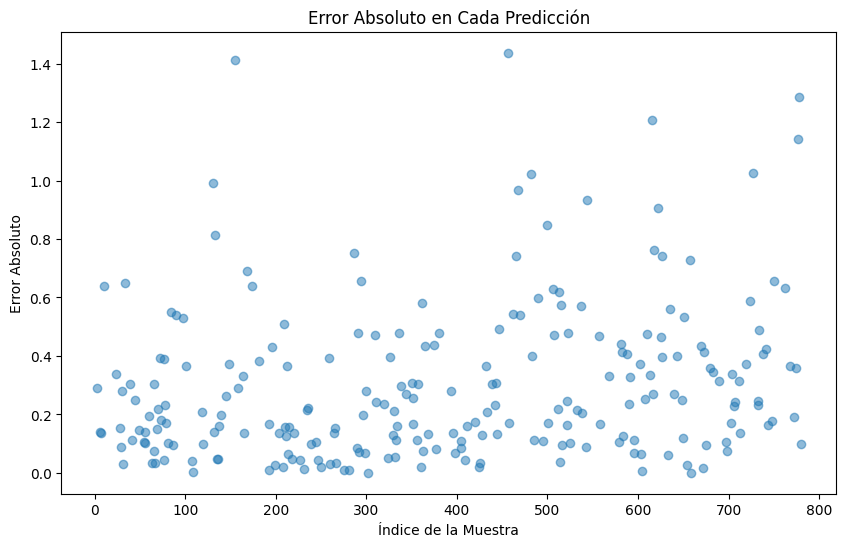

In [ ]:
absolute_errors = np.abs(errors)

plt.figure(figsize=(10, 6))
plt.plot(absolute_errors, 'o', alpha=0.5)
plt.xlabel("Índice de la Muestra")
plt.ylabel("Error Absoluto")
plt.title("Error Absoluto en Cada Predicción")
plt.show()

El modelo funciona bien en general, pero existen algunos puntos donde el error es mayor

Creamos un grafico de lineas para ver la comparacion de valores reales y predicciones 

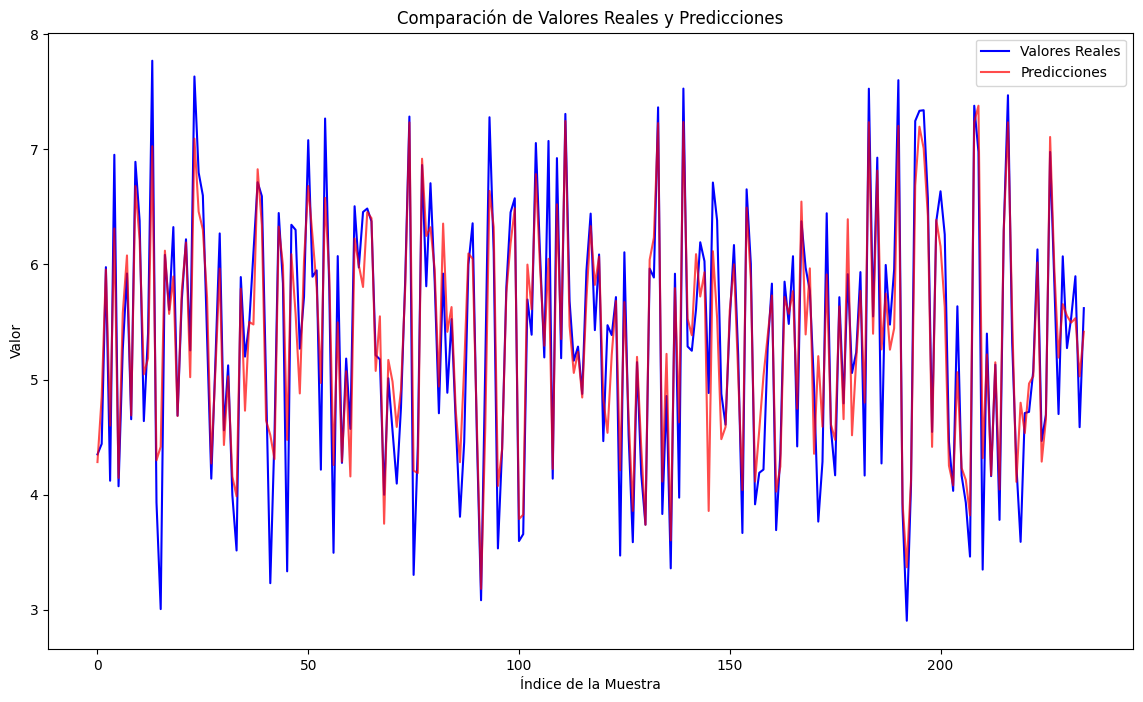

In [35]:
plt.figure(figsize=(14, 8))
plt.plot(y_test.reset_index(drop=True), label="Valores Reales", color="b")
plt.plot(y_pred, label="Predicciones", color="r", alpha=0.7)
plt.xlabel("Índice de la Muestra")
plt.ylabel("Valor")
plt.legend()
plt.title("Comparación de Valores Reales y Predicciones")
plt.show()


Este gráfico sugiere que el modelo tiene un buen ajuste a los datos reales, aunque puede haber algunas ligeras diferencias en ciertos puntos.

#### En colclusion 

En conclusion el modelo de regresion tiene resultados optimos con una precision del 86.26%, lo que es optima para la prediccion del indice de felicidad 